In [1]:
from matplotlib import pyplot as plt

def plot_results(title, training_results, testing_results):
    colors = ['red', 'blue', 'green', 'black']
    labels = ['relevant/correct', 'irrelevant/correct', 'relevant/incorrect', 'irrelevant/incorrect']
    
    (fig, ax) = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].set_xlabel('Epoch')
    ax[1].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_ylim(0, 1)
    fig.suptitle(title)
    m = training_results['loss_metrics']
    for (mm, color, label) in zip(m, colors, labels):
        ax[0].plot(mm, '--', color=color)
    m = testing_results['loss_metrics']
    for (mm, color, label) in zip(m, colors, labels):
        ax[0].plot(mm, '-', color=color, label=label)
    ax[0].legend()
    m = training_results['acc_metrics']
    for (mm, color, label) in zip(m, colors, labels):
        ax[1].plot(mm, '--', color=color)
    m = testing_results['acc_metrics']
    for (mm, color, label) in zip(m, colors, labels):
        ax[1].plot(mm, '-', color=color, label=label)
    ax[1].legend()
    plt.tight_layout()

Directory: naive_cifar10_correct_relevant
	Max training accuracy: 0.9980000000000001
	Max testing accuracy: 0.8288
	Min training loss: 0.0065046874806284904
	Min testing loss: 0.5728643536567688

Directory: naive_cifar10_correct_irrelevant
	Max training accuracy: 0.9984193283009488
	Max testing accuracy: 0.7952830016996615
	Min training loss: 0.005004443693906069
	Min testing loss: 0.6316548585891724

Directory: naive_cifar10_incorrect_relevant
	Max training accuracy: 0.9947599226415036
	Max testing accuracy: 0.638764648965376
	Min training loss: 0.017330175265669823
	Min testing loss: 1.1225796937942505

Directory: naive_cifar10_incorrect_irrelevant
	Max training accuracy: 0.8628935811991576
	Max testing accuracy: 0.5035881820591785
	Min training loss: 0.3281741440296173
	Min testing loss: 1.3492672443389893

Directory: ltrwe_cifar10_correct_relevant
	Max training accuracy: 0.9787346938775511
	Max testing accuracy: 0.8258000000000001
	Min training loss: 0.08634527027606964
	Min testin

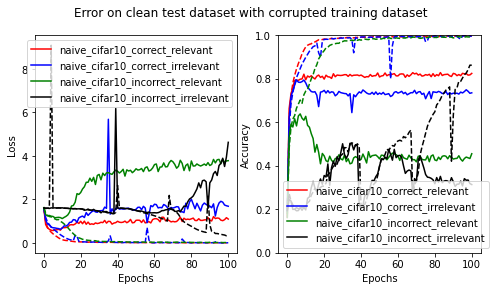

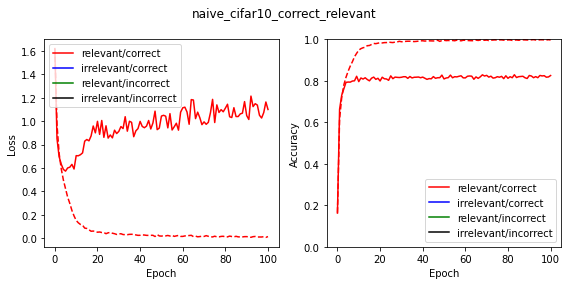

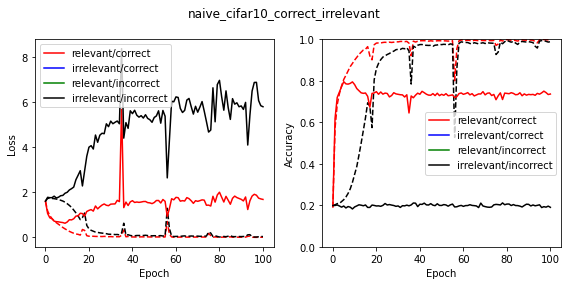

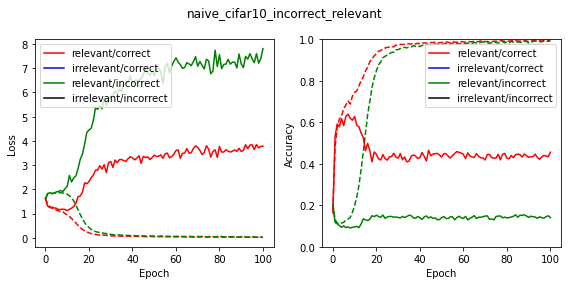

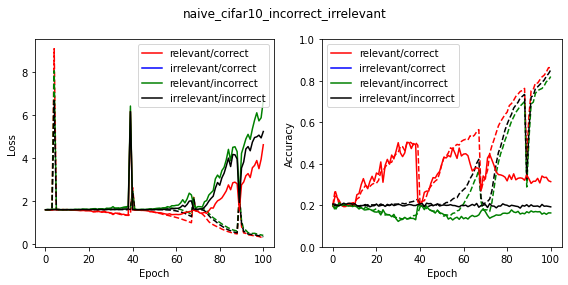

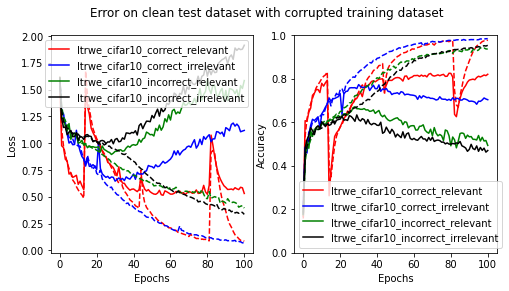

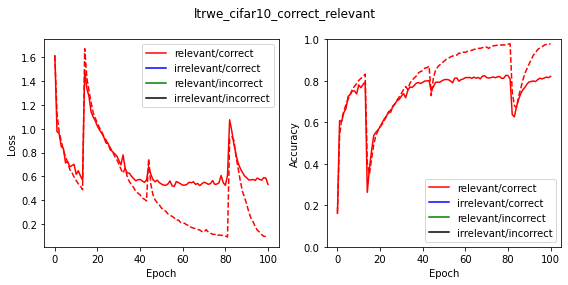

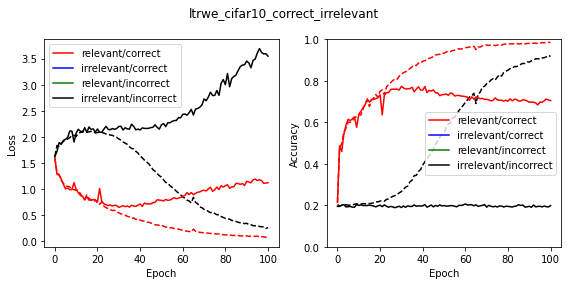

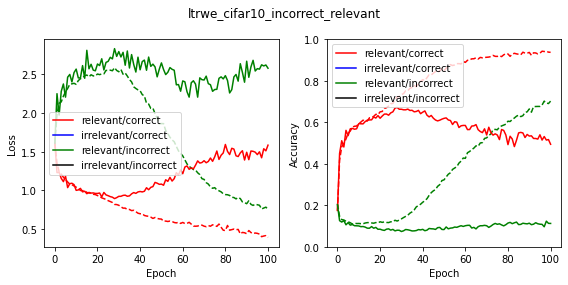

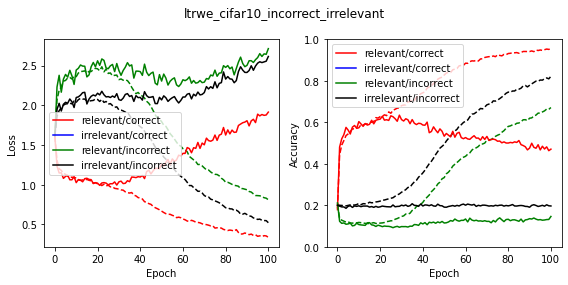

In [2]:
import os
import pickle
from matplotlib import pyplot as plt
import numpy as np

def plot_directories(directories):
    colors = ['red', 'blue', 'green', 'black']
    (fig, ax) = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].set_xlabel('Epochs')
    ax[1].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_ylim(0, 1)
    fig.suptitle('Error on clean test dataset with corrupted training dataset')

    for (directory, color) in zip(directories, colors):
        with open(os.path.join('.', 'results', directory, 'training_results.pickle'), 'rb') as F:
            training_results = pickle.load(F)
        with open(os.path.join('.', 'results', directory, 'testing_results.pickle'), 'rb') as F:
            testing_results = pickle.load(F)
        plot_results(directory, training_results, testing_results)
        training_loss = training_results['loss_metrics'][0]
        testing_loss = testing_results['loss_metrics'][0]
        training_acc = training_results['acc_metrics'][0]
        testing_acc = testing_results['acc_metrics'][0]
        print('Directory: {}'.format(directory))
        print('\tMax training accuracy: {}'.format(np.max(training_acc)))
        print('\tMax testing accuracy: {}'.format(np.max(testing_acc)))
        print('\tMin training loss: {}'.format(np.min(training_loss)))
        print('\tMin testing loss: {}'.format(np.min(testing_loss)))
        print()
        ax[0].plot(training_loss, '--', color=color)
        ax[0].plot(testing_loss, '-', color=color, label=directory)
        ax[1].plot(training_acc, '--', color=color)
        ax[1].plot(testing_acc, '-', color=color, label=directory)
    ax[0].legend()
    ax[1].legend()
    plt.tight_layout()

plot_directories(['naive_cifar10_correct_relevant',
                  'naive_cifar10_correct_irrelevant', 
                  'naive_cifar10_incorrect_relevant',
                  'naive_cifar10_incorrect_irrelevant'])
plot_directories(['ltrwe_cifar10_correct_relevant',
                  'ltrwe_cifar10_correct_irrelevant',
                  'ltrwe_cifar10_incorrect_relevant',
                  'ltrwe_cifar10_incorrect_irrelevant'])